# 1. Word2Vec : 10 dim
# 2. K=5 Means Clustering
# 3. Visualization : 3 dim (using PCA) 

In [56]:
import os, sys
sys.path.append(os.path.split(os.getcwd())[0])

from WordVector import WordVector

In [57]:
import data_helper
_,_,relation = data_helper.get_triplet()
relation[:5]

['cause', 'cause', 'cause', 'cause', 'cause']

In [58]:
len(relation)

277

In [59]:
relation = list(set(relation))
relation.sort()
relation[:5]

['abdominal', 'accompany', 'acquire', 'agent', 'airway']

In [60]:
relation.remove('eon')

## Word2Vec 10dim

In [82]:
wv = WordVector(relation, dim=10)

Loading a pre-trained model...
Load success!


In [83]:
wv.word[:5]

['abdominal', 'accompany', 'acquire', 'agent', 'airway']

In [84]:
wv.vector[0]

array([ 4.53994846, -2.47238946, -0.90478045, -1.74013925, -2.18651223,
       -0.96467024,  5.10401535, -0.50455737, -0.4024519 ,  0.53299963], dtype=float32)

In [85]:
word_frequency = [(word, wv.model.wv.vocab[word].count) for word in relation]
word_frequency[:5]

[('abdominal', 376),
 ('accompany', 344),
 ('acquire', 648),
 ('agent', 2235),
 ('airway', 401)]

## K=5 Means Clustering

In [86]:
from sklearn import cluster

In [87]:
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(vec_3d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [88]:
label = k_means.labels_
label[:5]

array([2, 0, 2, 1, 2], dtype=int32)

### Result with frequency

In [89]:
import pandas as pd
import numpy as np

In [90]:
df = pd.DataFrame(columns=['Relation', 'Cluster'])
df['Relation'] = relation
df['Cluster'] = label
df['Frequency'] = [f[1] for f in word_frequency]

In [91]:
df.sort_values(['Relation'], inplace=True)
df.reset_index(drop=True, inplace=True)

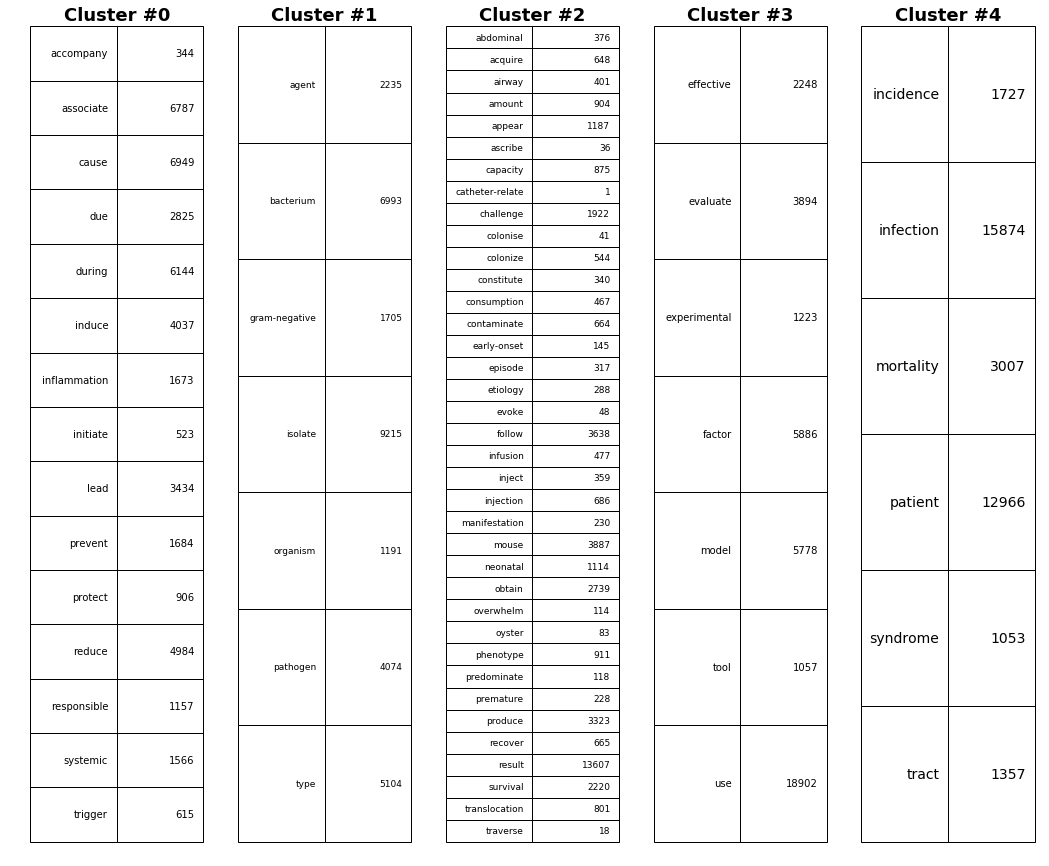

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(18,15))
bbox = [0,0,1,1]

ax1 = fig.add_subplot(151)
ax1.set_title('Cluster #0', fontsize=18, fontweight='bold')
ax1.axis('off')
ax1.table(cellText = df[df.Cluster == 0].drop('Cluster', axis=1).values, bbox=bbox).set_fontsize(24)

ax2 = fig.add_subplot(152)
ax2.set_title('Cluster #1', fontsize=18, fontweight='bold')
ax2.axis('off')
ax2.table(cellText = df[df.Cluster == 1].drop('Cluster', axis=1).values, bbox=bbox).set_fontsize(24)

ax3 = fig.add_subplot(153)
ax3.set_title('Cluster #2', fontsize=18, fontweight='bold')
ax3.axis('off')
ax3.table(cellText = df[df.Cluster == 2].drop('Cluster', axis=1).values, bbox=bbox).set_fontsize(24)

ax4 = fig.add_subplot(154)
ax4.set_title('Cluster #3', fontsize=18, fontweight='bold')
ax4.axis('off')
ax4.table(cellText = df[df.Cluster == 3].drop('Cluster', axis=1).values, bbox=bbox).set_fontsize(24)

ax5 = fig.add_subplot(155)
ax5.set_title('Cluster #4', fontsize=18, fontweight='bold')
ax5.axis('off')
ax5.table(cellText = df[df.Cluster == 4].drop('Cluster', axis=1).values, bbox=bbox).set_fontsize(24)

# Visualization(PCA) 3dim 

In [93]:
from DimensionReduction import DimensionReduction
dr = DimensionReduction()
vec_3d = dr.PCA(wv.vector, dim=3)
vec_3d[:3]

Explained variation per principal component: [ 0.21845825  0.18643348  0.14509866]
Average of Explained variations: 0.5499904155731201


array([[ 2.53381824, -1.92207694, -4.63692999],
       [ 0.64221305, -3.06675124, -0.45454338],
       [ 0.39645389,  1.82112849,  1.49078739]], dtype=float32)

In [94]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

In [101]:
colors=["rgb(255,0,0)", "rgb(0,255,0)", "rgb(0,0,255)", "rgb(255,255,0)", "rgb(255,0,255)", 
        "rgb(0,255,255)", "rgb(127,0,255)", "rgb(255,128,0)","rgb(255,0,127)", "rgb(128,128,128)"]

cluster_labels = df['Cluster']

In [104]:
fig = tools.make_subplots(rows=1, cols=1,
                         print_grid=False,
                         specs=[[{'is_3d': True}]])

labeled_vec = list(zip(vec_3d, cluster_labels))
# Labeling the clusters
centers_ = k_means.cluster_centers_
for i in range(5):
    ith_cluster_vector = np.array([v for (v,c) in labeled_vec if c == i])
    # colors = matplotlib.colors.colorConverter.to_rgb(cm.spectral(float(i) / n_clusters))
    # colors = 'rgb'+str(colors)

    clusters = go.Scatter3d(x=ith_cluster_vector[:, 0], 
                            y=ith_cluster_vector[:, 1], 
                            z=ith_cluster_vector[:, 2],
                            showlegend=False,
                            mode='markers',
                            marker=dict(
                                color=colors[i],
                                size=3,
                                line=dict(
                                    width=0.5
                                )
                            )
                           )
    fig.append_trace(clusters, 1, 1)

    # Draw white circles at cluster centers
    centers = go.Scatter3d(x=centers_[i][0], 
                           y=centers_[i][1],
                           z=centers_[i][2],
                           showlegend=False,
                           mode='markers',
                           marker=dict(
                               color=colors[i], size=5,
                               line=dict(color='black', width=1))
                           )

    fig.append_trace(centers, 1, 1)



In [106]:
py.iplot(fig)